# Tarea 2: Regresión sobre el California Housing Dataset

## Introducción

En esta tarea, el objetivo es desarrollar modelos de **regresión** que sean capaces de predecir el **precio medio de las casas** en distintas regiones de California, utilizando el *California Housing Dataset*. 

### Objetivos
1. Cargar y explorar el **California Housing Dataset**.
2. Realizar un análisis exploratorio de los datos (**EDA**).
3. Aplicar técnicas de preprocesamiento y transformación de datos.
4. Desarrollar dos modelos de regresión para predecir el precio medio de las casas.
5. Evaluar el rendimiento de los modelos utilizando métricas de regresión como **MAE** y **RMSE**.

## Descripción del Dataset

El **California Housing Dataset** contiene información relacionada con varias características de diferentes bloques de viviendas en California:

- `Median Income`: Ingreso medio en el bloque.
- `House Median Age`: Edad media de las casas en el bloque.
- `Total Rooms`: Número total de habitaciones.
- `Total Bedrooms`: Número total de dormitorios.
- `Population`: Población en el bloque.
- `Households`: Número total de hogares.
- `Latitude`: Latitud del bloque.
- `Longitude`: Longitud del bloque.
- `Median House Value`: Valor medio de la vivienda (esta es la variable objetivo).
- `Ocean Proximity`: Proximidad al océano (variable categórica que indica qué tan cerca está la casa del océano).




## 1. Análisis Exploratorio de Datos (EDA)

### 1.1 Cargar los datos

In [4]:
import pandas as pd

houses = pd.read_csv('CaliforniaHousing.csv')

houses.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.2 Dimensiones y estadísticas básicas

#### Dimensiones del dataframe

In [7]:
houses.shape

(20640, 10)

#### Información del dataset

In [9]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Nota**: La columna `Total Bedrooms` contiene algunos valores faltantes, por lo que será necesario imputarlos o tratarlos de otra manera en el preprocesamiento de los datos.

#### Estadísticas descriptivas

In [12]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Análisis de la variable categórica

In [14]:
houses['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

**Nota**: Se debe aplicar **One Hot Encoding** a las variables categóricas para evaluar su correlación con el precio medio de las casas, lo que ayudará a mejorar la precisión del modelo.


### 1.3 Visualización de las distribuciones de las variables

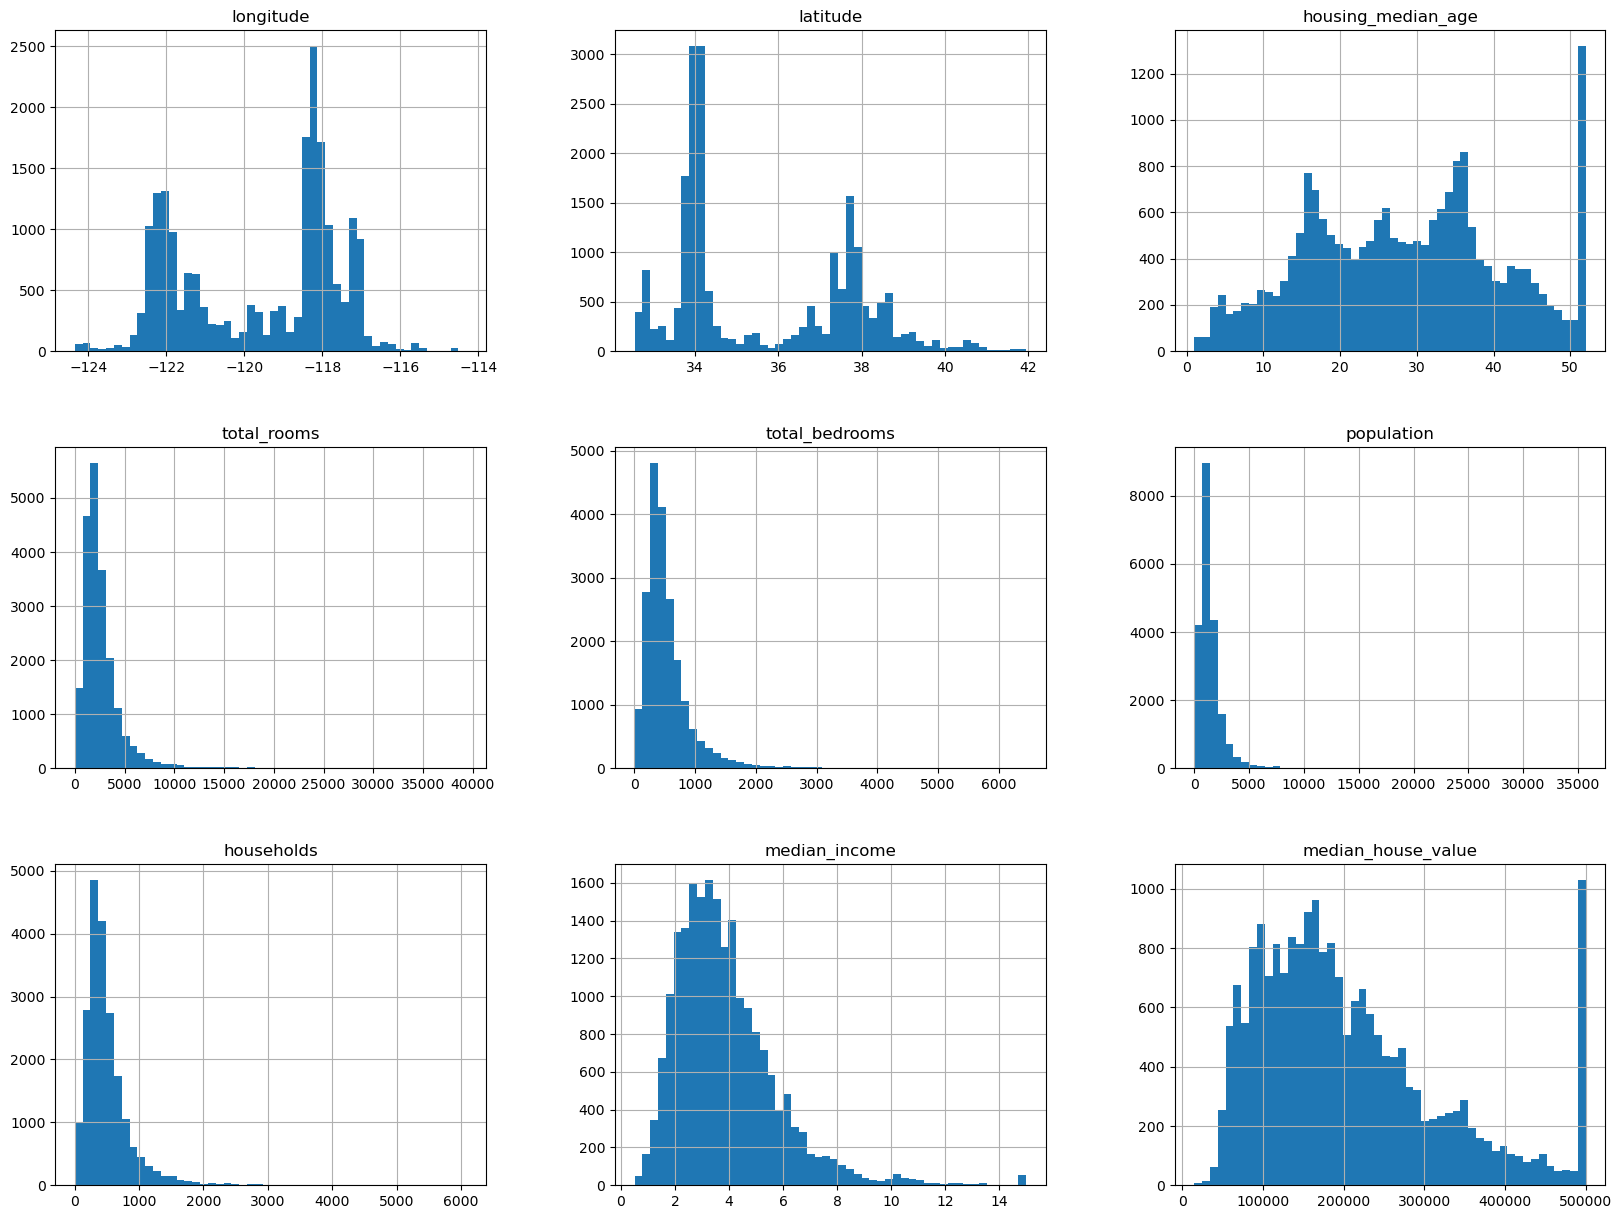

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

houses.hist(bins=50, figsize=(20,15))
plt.show()

> **Conclusiones:**:
> - El atributo `median income` ha sido escalado y limitado entre 0.5 y 15, representando decenas de miles de dólares.
> - Las características presentan escalas diferentes, lo que requerirá técnicas de escalado.
> - Varios histogramas están sesgados hacia la derecha, lo que podría dificultar la detección de patrones para algunos algoritmos. Será necesario transformar los datos para que tengan una distribución más simétrica.


### 1.4 Visualización geográfica de los datos 

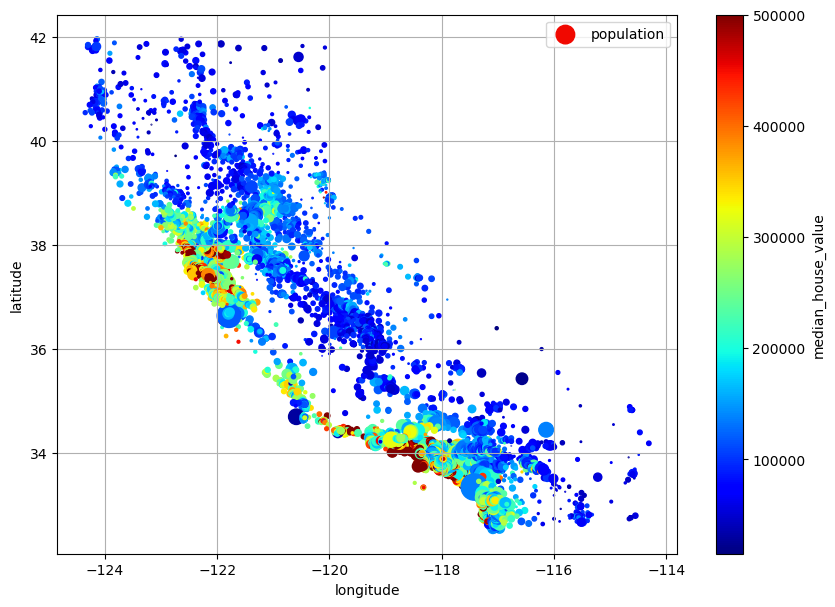

In [20]:
houses.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=houses["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

>**Conclusiones**:
> - Los precios de casas en California presentan **variaciones geográficas notables**, destacándose la formación de **clusters** en áreas urbanas y costeras según el **mapa de calor**. 


#### 1.5 Matriz de correlación

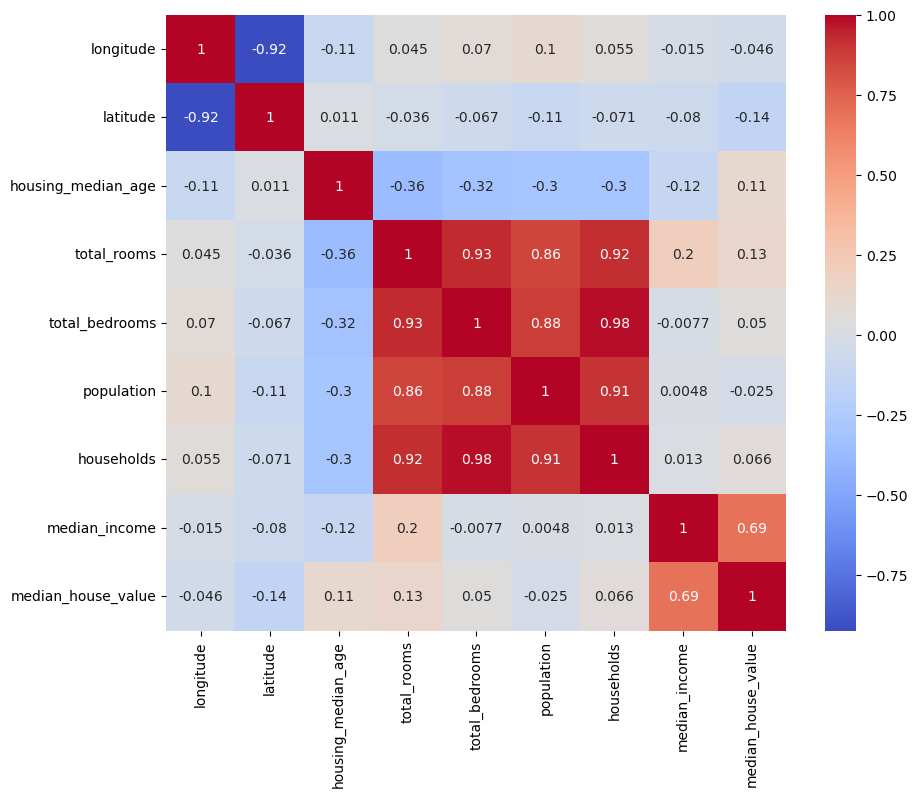

In [23]:
import seaborn as sns

corr_matrix = houses.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


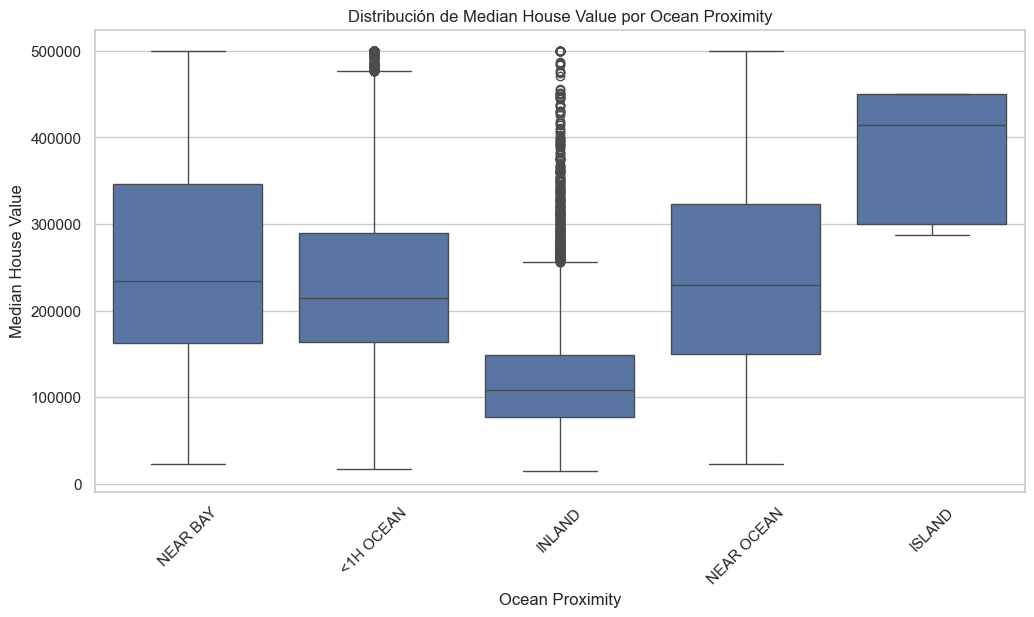

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=houses)
plt.title('Distribución de Median House Value por Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()


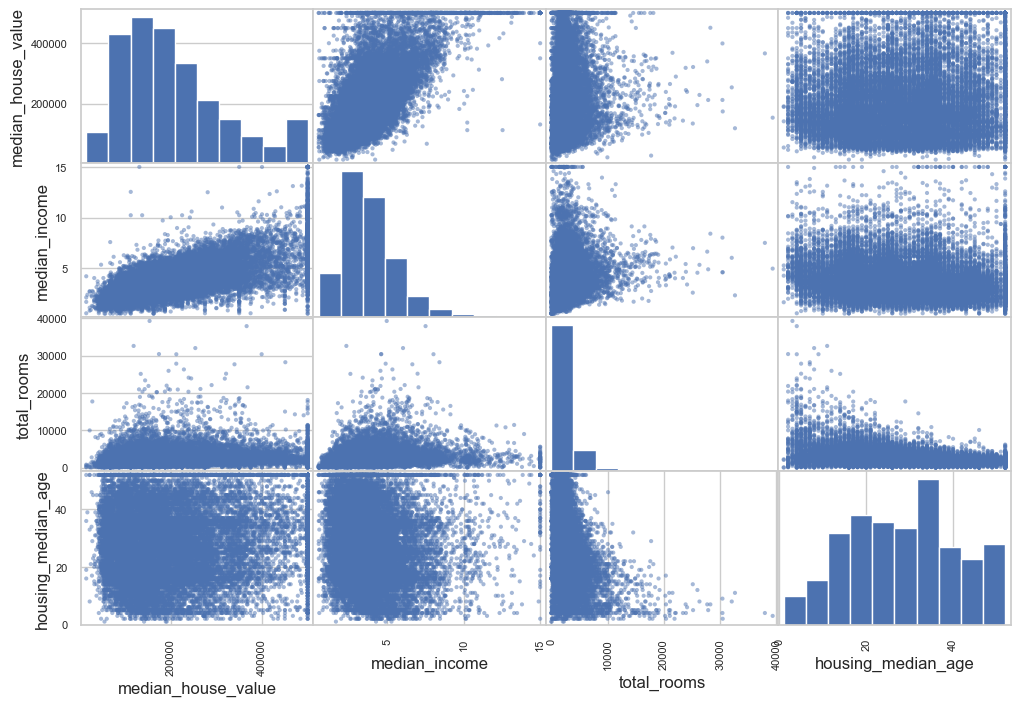

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(houses[attributes], figsize=(12,8))
plt.show()

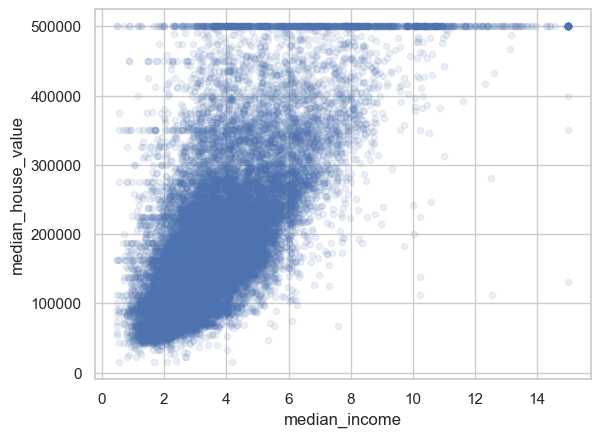

In [26]:
houses.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1, grid=True)
plt.show()

> **Conclusiones** :

> - El atributo `median_income` está fuertemente correlacionado con el precio medio de las viviendas, lo que lo convierte en una variable clave para la predicción. Por esta razón, es crucial utilizar **Stratified Sampling** para dividir los datos en conjuntos de entrenamiento y prueba, asegurando que cada subconjunto mantenga la misma proporción de ingresos, lo cual mejora la representatividad del muestreo y la precisión de los modelos.
> - El gráfico revela varias posibles anomalías, como las líneas horizontales en \$500,000, \$450,000 y \$350,000. Estos valores atípicos pueden distorsionar el aprendizaje del modelo. Se debe considerar la eliminación o el tratamiento de los distritos correspondientes para mejorar la precisión del modelo.
.



### 1.6 Análisis de Outliers

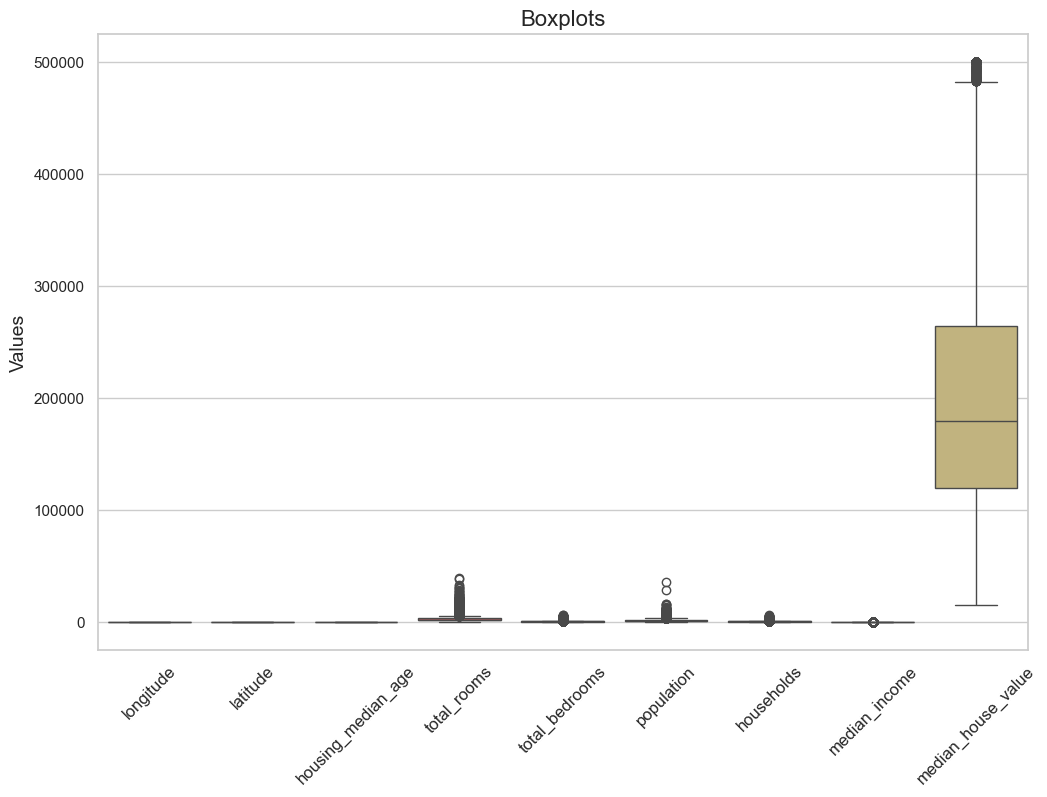

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=houses)
plt.title('Boxplots', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

**Nota**: Se detectaron outliers en las variables `median_house_value`, `population` y `total_rooms`. Por lo tanto, se decidió removerlos aplicando la técnica de eliminación basada en percentiles, ya que podrían afectar la precisión de los modelos.



## 2. Preparación de los datos

### 2.1 Eliminar Outliers

In [33]:
print(houses.shape)

percentil_90_mhv = houses['median_house_value'].quantile(0.90)
percentil_90_rooms = houses['total_rooms'].quantile(0.95)
percentil_93_pop = houses['population'].quantile(0.95)

houses = houses.loc[
    lambda x: (x['median_house_value'] <= percentil_90_mhv) &
              (x['total_rooms'] <= percentil_90_rooms) &
              (x['population'] <= percentil_93_pop)
]

print(houses.shape)



(20640, 10)
(17348, 10)


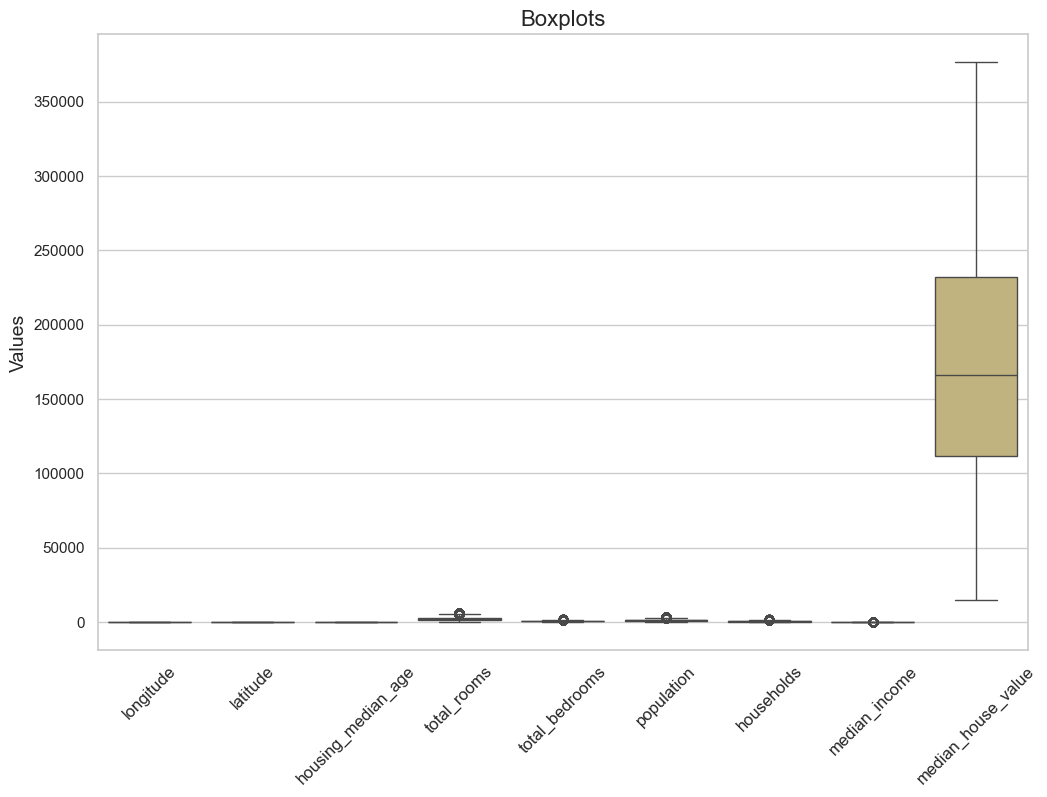

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=houses)
plt.title('Boxplots', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### 2.2 Dividir en conjuntos de entrenamiento y prueba con Stratified Sampling (median_income)

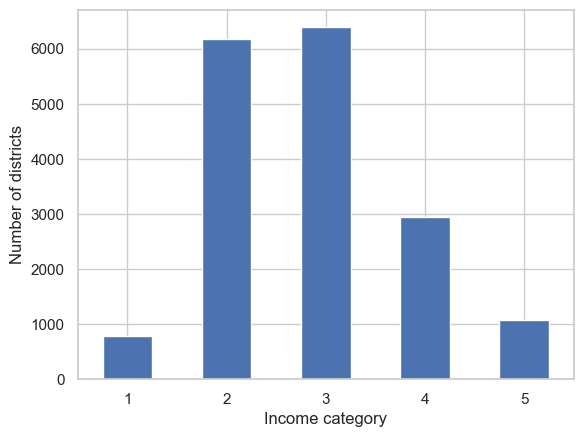

In [36]:
import numpy as np

houses_copy = houses.copy()

houses_copy["income_cat"] = pd.cut(houses_copy["median_income"],
                                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                   labels=[1, 2, 3, 4, 5])

houses_copy["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

houses = houses_copy


In [37]:
from sklearn.model_selection import train_test_split

X = houses.drop("median_house_value", axis=1)
y = houses["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=houses["income_cat"], random_state=42
)

X_train["income_cat"].value_counts()/len(X_train)

income_cat
3    0.368137
2    0.355455
4    0.169189
5    0.061824
1    0.045396
Name: count, dtype: float64

**Nota**: Una vez que los conjuntos de datos han sido estratificados, se puede prescindir de la columna `income_cat`, ya que su propósito era garantizar una representación equitativa en el muestreo.


In [39]:
for set_ in (X_train,X_test):
    set_.drop('income_cat', axis=1, inplace=True)

### 2.3 Combinación de relaciones entre características

#### Habitaciones por Hogar

In [42]:
X_train['rooms_per_household'] = X_train['total_rooms'] / X_train['households']
X_test['rooms_per_household'] = X_test['total_rooms'] / X_test['households']

In [43]:
X_train_with_target = X_train.copy()
X_train_with_target["median_house_value"] = y_train

corr_matrix = X_train_with_target.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.622303
total_rooms            0.190320
households             0.128882
total_bedrooms         0.097648
rooms_per_household    0.087583
housing_median_age     0.051210
population             0.023005
longitude             -0.023922
latitude              -0.177593
Name: median_house_value, dtype: float64

**Nota**: Los nuevos atributos creados no mostraron una correlación significativa con la variable objetivo `median_house_value`, lo que sugiere que su impacto en el modelo puede ser muy limitado, solo tomamos `rooms_per_households`.


### 2.4 Tratamiento de Datos Categóricos

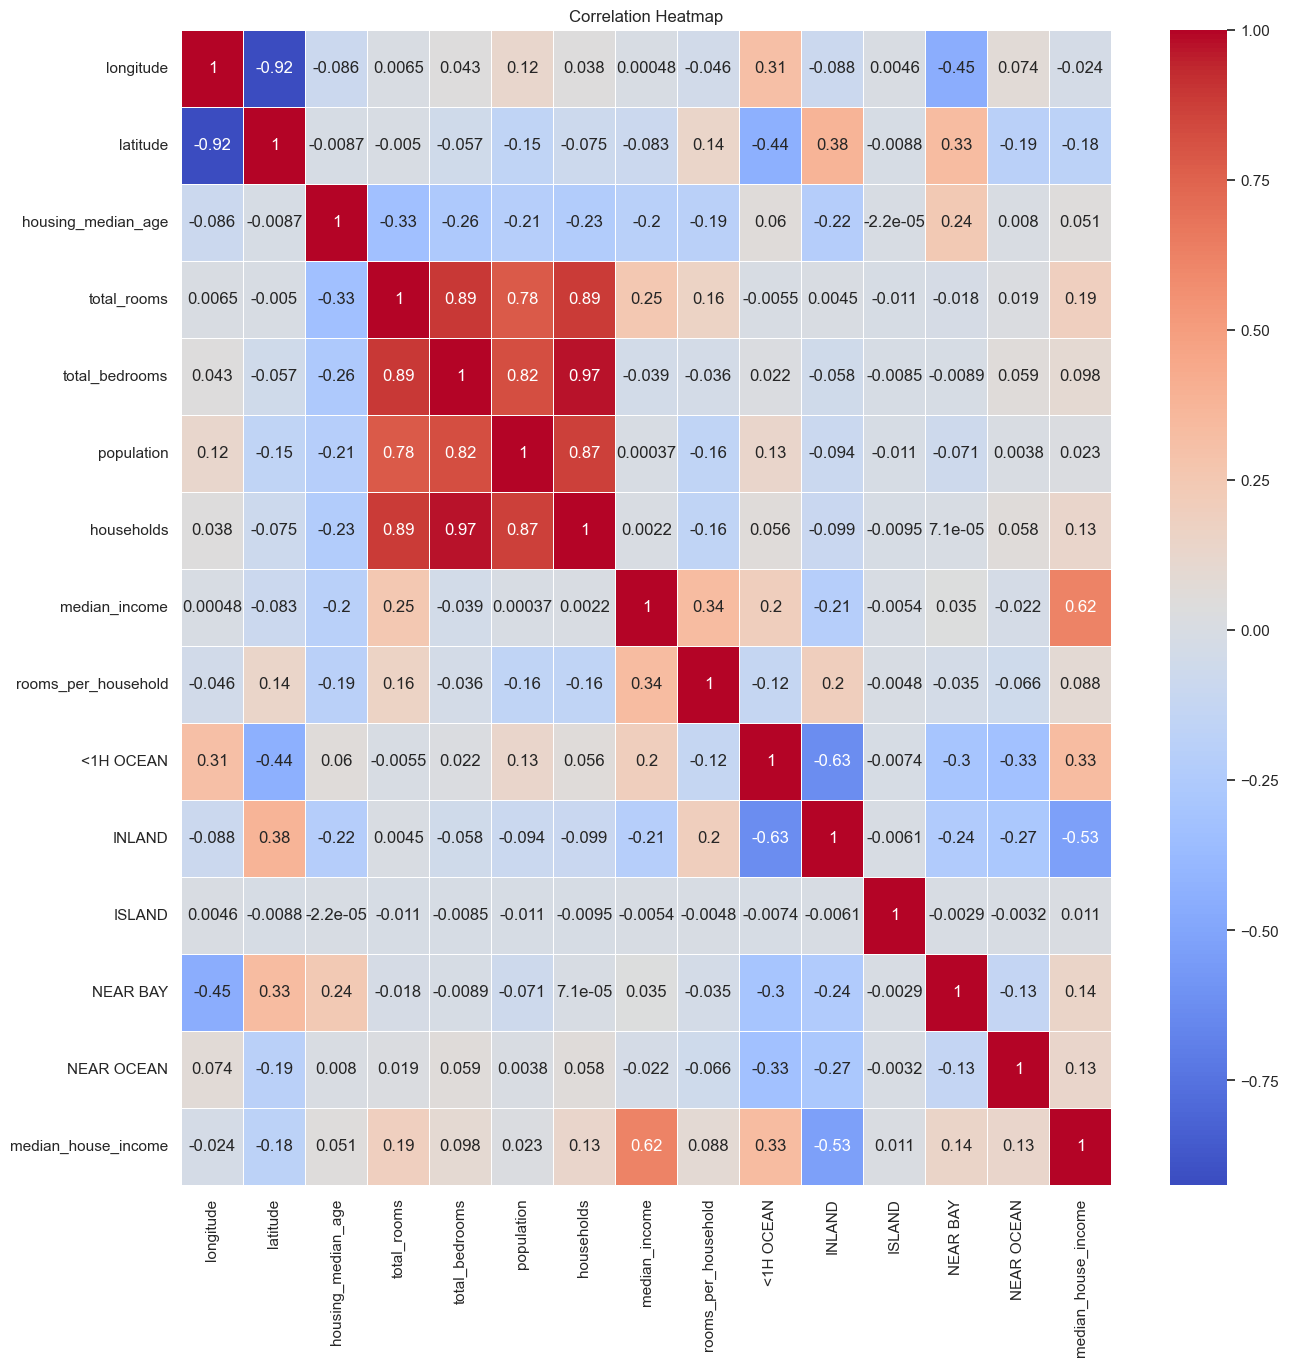

In [46]:
train_dumm = pd.get_dummies(X_train.ocean_proximity)
test_dumm = pd.get_dummies(X_test.ocean_proximity)

X_train = pd.concat([X_train,train_dumm],axis='columns')
X_test = pd.concat([X_test,test_dumm],axis='columns')

boolean_columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


X_train[boolean_columns] = X_train[boolean_columns].astype(int)
X_test[boolean_columns] = X_test[boolean_columns].astype(int)

X_train = X_train.drop(['ocean_proximity'],axis='columns')
X_test = X_test.drop(['ocean_proximity'],axis='columns')

X_train_with_target = X_train.copy()
X_train_with_target["median_house_income"] = y_train 

correlation_matrix = X_train_with_target.corr()
plt.figure(figsize=(15, 15))

sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',linewidths=0.5) 

plt.title('Correlation Heatmap')
plt.show()

Una vez transformado el atributo categórico `ocean_proximity`, se procedió a calcular la **matriz de correlación** para evaluar la relación entre las nuevas variables predictoras y la variable objetivo (`median_house_value`).

En algunos casos, se observó una correlación significativa entre las variables creadas a partir de `ocean_proximity` y el precio medio de las viviendas, lo que indica que la proximidad al océano tiene un impacto relevante en el valor de las casas. 


### 2.5 Tratamiento de Valores Faltantes

El conjunto de datos presenta valores faltantes, particularmente en la columna `total_bedrooms` . Se utilizará **SimpleImputer** con la estrategia de la mediana para completar estos valores, lo que ofrece una solución rápida y eficaz frente a distribuciones sesgadas.


In [50]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy="median")

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

print(X_train.isna().sum() + X_test.isna().sum())


longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
rooms_per_household    0
<1H OCEAN              0
INLAND                 0
ISLAND                 0
NEAR BAY               0
NEAR OCEAN             0
dtype: int64


### 2.6 Transformaciones

### Importancia de Transformar Distribuciones Sesgadas

Es crucial evitar distribuciones sesgadas y transformarlas a una distribución normal para mejorar la precisión de los modelos estadísticos. Muchos algoritmos asumen normalidad en los datos, lo que facilita interpretaciones y comparaciones. Además, las transformaciones pueden mitigar el impacto de los outliers y optimizar el rendimiento del modelo.


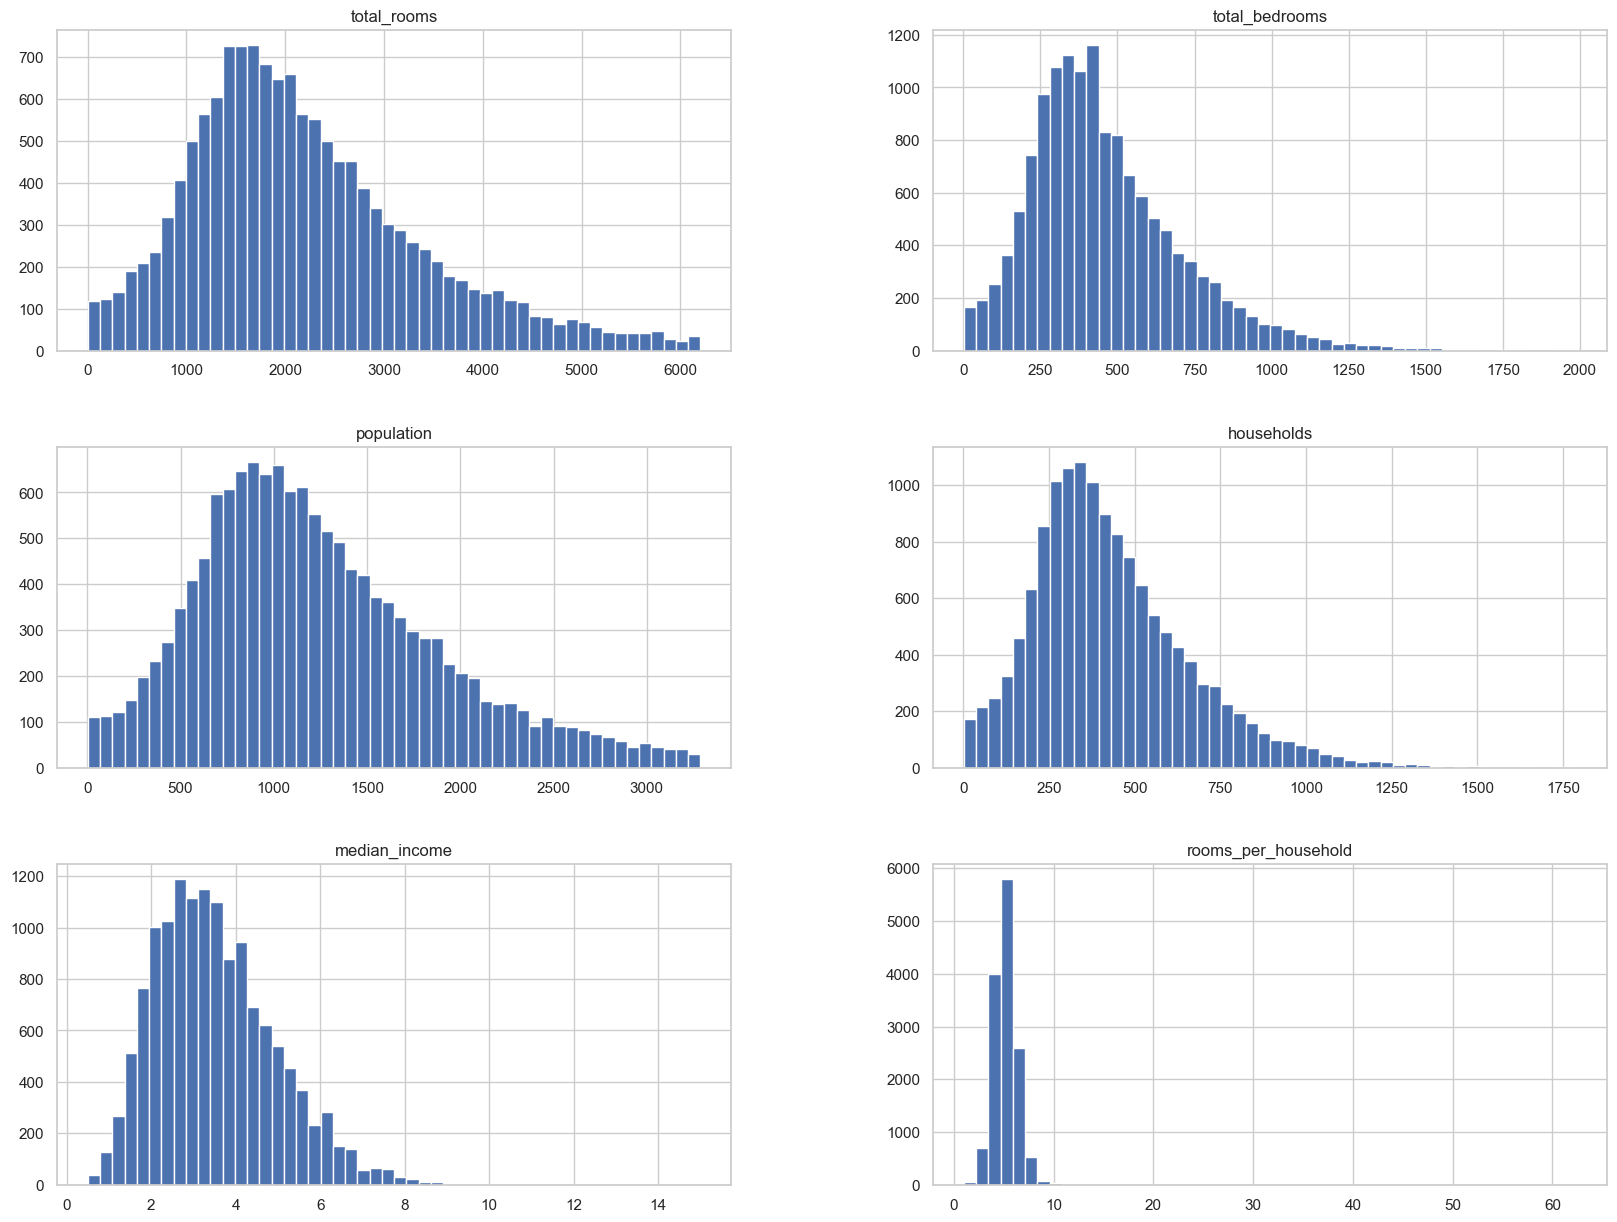

In [53]:
X_train[["total_rooms","total_bedrooms","population","households","median_income","rooms_per_household"]].hist(bins=50,figsize=(20,15))
plt.show()

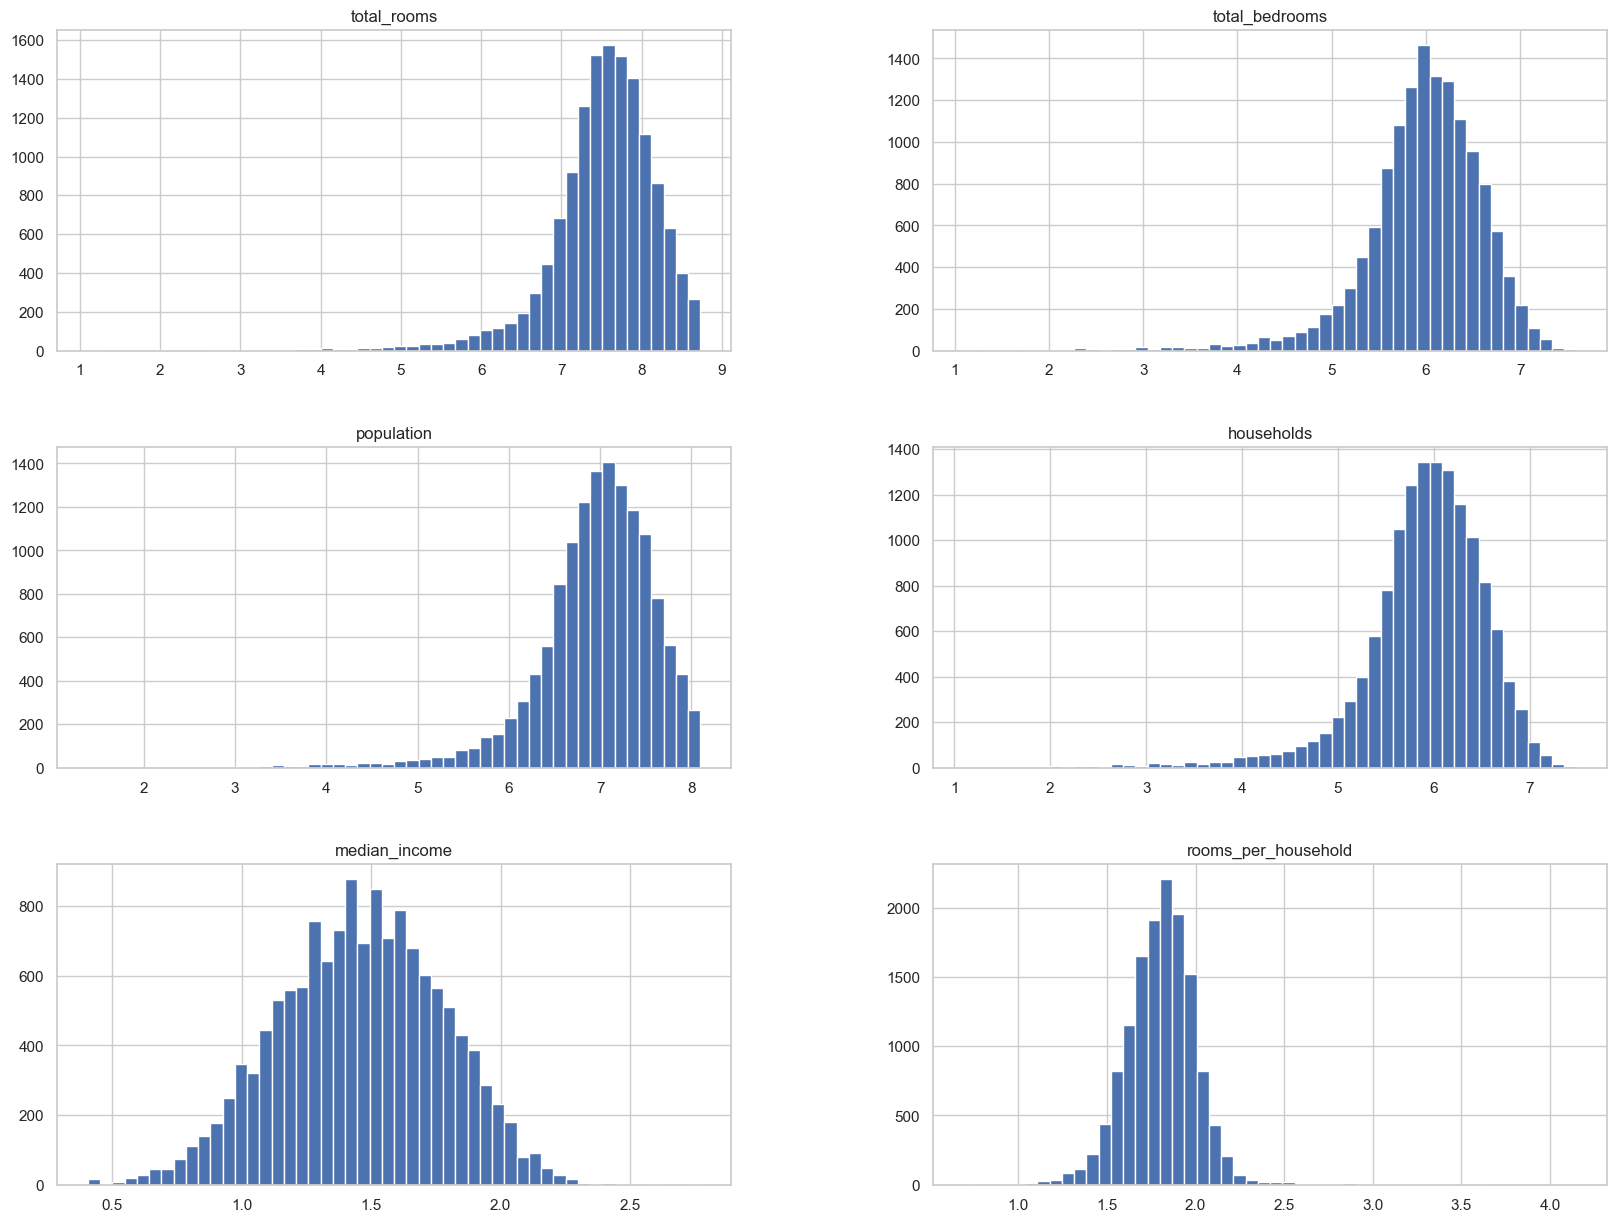

In [54]:
import numpy as np

attributes_to_transform = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "rooms_per_household"]

X_train[attributes_to_transform] = np.log1p(X_train[attributes_to_transform])
X_test[attributes_to_transform] = np.log1p(X_test[attributes_to_transform])


X_train[["total_rooms","total_bedrooms","population","households","median_income","rooms_per_household"]].hist(bins=50,figsize=(20,15))
plt.show()


**Nota** : Las transformaciones logarítmicas realizadas en los atributos han permitido que sus distribuciones se asemejen más a una distribución gaussiana. Esto favorece el rendimiento del modelo de aprendizaje automático, mejorando la precisión de las predicciones y la convergencia del algoritmo.

### 2.7 Escalado

Se aplicará **StandardScaler** a las características numéricas del conjunto de datos para normalizarlas, logrando que tengan una media de 0 y una desviación estándar de 1. Este escalado es crucial para mejorar el rendimiento de muchos algoritmos de machine learning. Al hacerlo, se optimiza la convergencia del modelo y se facilita la comparación de variables.

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


Los datos están listos para alimentar los modelos de machine learning, tras aplicar las transformaciones necesarias y el escalado. Esto facilitará un mejor rendimiento de los modelos.

## 3. Selección y Entrenamiento de los Modelos

En esta sección, se llevará a cabo el entrenamiento de los modelos Decision Tree y Random Forest. Se aplicará un enfoque sistemático que incluye la búsqueda de hiperparámetros óptimos mediante Grid Search Cross-Validation (GridCV), seguido de una comparación exhaustiva de ambos modelos.

### 3.1 Entrenamiento y Ajuste de Modelos

#### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt_regressor = DecisionTreeRegressor(random_state=42)

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_


#### Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_


### 3.2 Análisis de los resultados y comparación entre los modelos

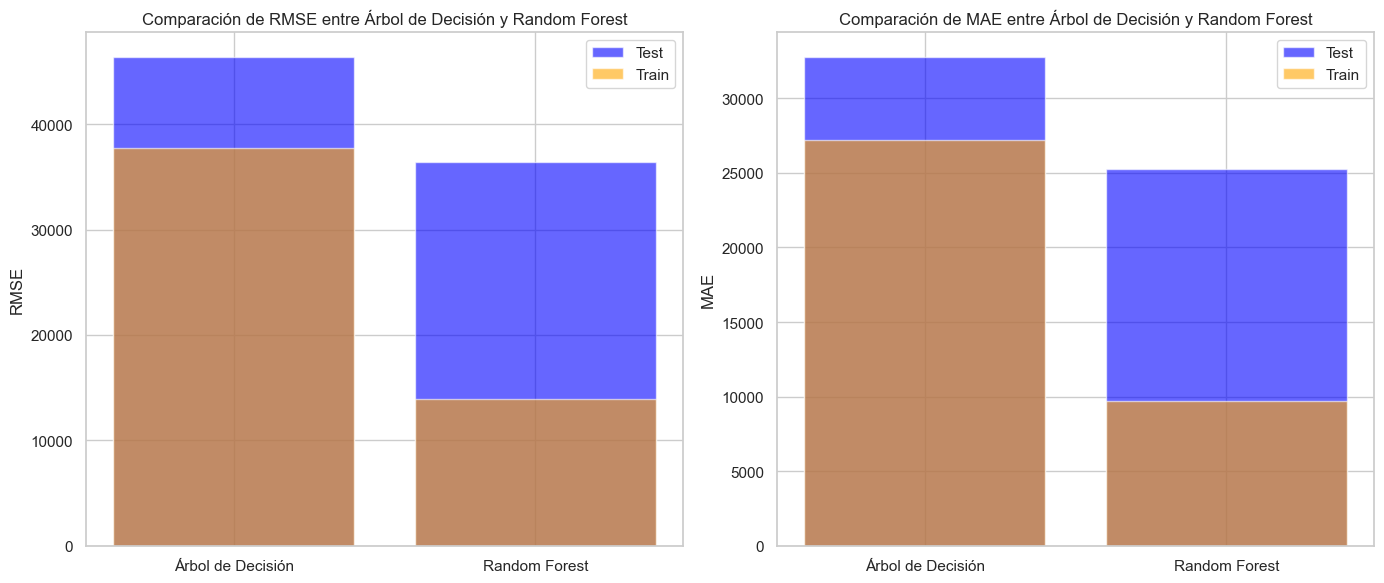

RMSE del Árbol de Decisión (Test): 46374.85683045649
RMSE del Random Forest (Test): 36419.16001903906
RMSE del Árbol de Decisión (Train): 37764.47908638423
RMSE del Random Forest (Train): 13905.245017939871
MAE del Árbol de Decisión (Test): 32769.53056225497
MAE del Random Forest (Test): 25248.810596541785
MAE del Árbol de Decisión (Train): 27199.796311544404
MAE del Random Forest (Train): 9709.700954027958


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Evaluación de modelos en el conjunto de prueba
dt_predictions_test = best_dt_model.predict(X_test)
rf_predictions_test = best_rf_model.predict(X_test)

dt_mse_test = mean_squared_error(y_test, dt_predictions_test)
rf_mse_test = mean_squared_error(y_test, rf_predictions_test)

dt_mae_test = mean_absolute_error(y_test, dt_predictions_test)
rf_mae_test = mean_absolute_error(y_test, rf_predictions_test)

# Evaluación de modelos en el conjunto de entrenamiento
dt_predictions_train = best_dt_model.predict(X_train)
rf_predictions_train = best_rf_model.predict(X_train)

dt_mse_train = mean_squared_error(y_train, dt_predictions_train)
rf_mse_train = mean_squared_error(y_train, rf_predictions_train)

dt_mae_train = mean_absolute_error(y_train, dt_predictions_train)
rf_mae_train = mean_absolute_error(y_train, rf_predictions_train)

# Resultados para visualización
labels = ['Árbol de Decisión', 'Random Forest']

# Cálculo de RMSE
rmse_values_test = [np.sqrt(dt_mse_test), np.sqrt(rf_mse_test)]
rmse_values_train = [np.sqrt(dt_mse_train), np.sqrt(rf_mse_train)]
mae_values_test = [dt_mae_test, rf_mae_test]
mae_values_train = [dt_mae_train, rf_mae_train]

# Gráfica de RMSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(labels, rmse_values_test, color='blue', alpha=0.6, label='Test')
plt.bar(labels, rmse_values_train, color='orange', alpha=0.6, label='Train')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre Árbol de Decisión y Random Forest')
plt.legend()

# Gráfica de MAE
plt.subplot(1, 2, 2)
plt.bar(labels, mae_values_test, color='blue', alpha=0.6, label='Test')
plt.bar(labels, mae_values_train, color='orange', alpha=0.6, label='Train')
plt.ylabel('MAE')
plt.title('Comparación de MAE entre Árbol de Decisión y Random Forest')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir resultados
print(f'RMSE del Árbol de Decisión (Test): {np.sqrt(dt_mse_test)}')
print(f'RMSE del Random Forest (Test): {np.sqrt(rf_mse_test)}')
print(f'RMSE del Árbol de Decisión (Train): {np.sqrt(dt_mse_train)}')
print(f'RMSE del Random Forest (Train): {np.sqrt(rf_mse_train)}')

print(f'MAE del Árbol de Decisión (Test): {dt_mae_test}')
print(f'MAE del Random Forest (Test): {rf_mae_test}')
print(f'MAE del Árbol de Decisión (Train): {dt_mae_train}')
print(f'MAE del Random Forest (Train): {rf_mae_train}')
